# Introduction to neural network classification with tensorflow
In this notebook we're going to learn how to wirte neural network for classification

A few types of classification:
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles
# Make 100 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)
X  #features

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]  #labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now so let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"XO":X[:,0],"X1":X[:,1],"Label":y})
circles

,XO,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


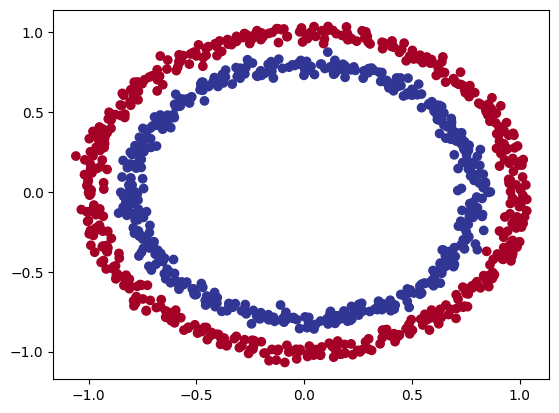

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

# Input and Output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
 X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),  # Create an instance of the loss function
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.6673 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.1419 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 6.0260 - accuracy: 0.4520
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 5.7313 - accuracy: 0.4730
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 5.0294 - accuracy: 0.4570


In [ ]:
# Let's try and improve the model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing

so adding an extra layer...

# Improving our model
1. Add more layers/increase hidden units within a layer while creating
2. Choose Adam() instead of SGD()
3. More epochs - train longer

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y) # Still 50% accuracy after 3 layers with over 100 units

32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5110


[0.6976590752601624, 0.5109999775886536]

#To visualizer our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predicistion across the meshgrid
* Plot the predictions as a line between zones (where each unique class falls)


In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model,x,y):
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in= np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together (np.c_)
  # make preds
  y_pred = model.predict(x_in)
  # check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    # We have to reshape our predictions toget them ready for plotting
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


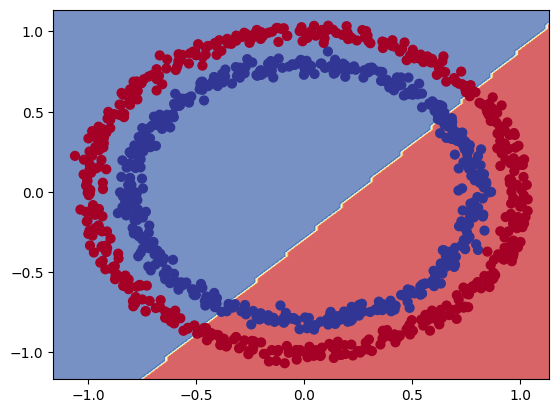

In [ ]:
# Check out the preds our model is making
plot_decision_boundary(model = model_2, x=X, y=y)

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)
X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5) # y = X+100

# Split our reg data into train and test sets
X_tr = X_reg[:150]
X_te = X_reg[150:]
y_tr = y_reg[:150]
y_te = y_reg[150:]


We compiled our model (model_2) for binary classification problem . But we're now working on a regression problem, let's change the model to suit our data

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

X_tr_expanded = np.expand_dims(X_tr, axis=-1)

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_tr, axis=1), y_tr, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 412.6461 - mae: 412.6461
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 291.5833 - mae: 291.5833
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 174.6183 - mae: 174.6183
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 60.2151 - mae: 60.2151
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 75.5710 - mae: 75.5710
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 86.1935 - mae: 86.1935
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 55.7108 - mae: 55.7108
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 48.6524 - mae: 48.6524
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1718 - mae: 48.1718
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.7798 - mae: 43.7798
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


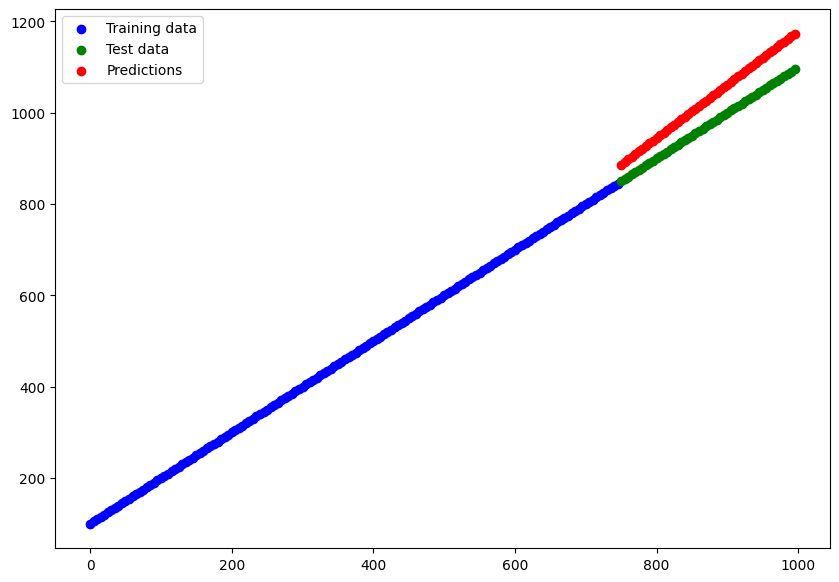

In [ ]:
# Make predictions with our trained model
X_te_expanded = np.expand_dims(X_te, axis=-1)
y_pred = model_3.predict(X_te_expanded)

# plot regression
plt.figure(figsize=(10,7))
plt.scatter(X_tr,y_tr,c="b",label="Training data")
plt.scatter(X_te,y_te,c="g",label="Test data")
plt.scatter(X_te,y_pred,c="r",label="Predictions")
plt.legend();

# Non - Linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)])

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_4.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.7566 - accuracy: 0.5021
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7463 - accuracy: 0.4936
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5289 - accuracy: 0.5017
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4638 - accuracy: 0.4954
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4117 - accuracy: 0.4992
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4008 - accuracy: 0.4992
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3721 - accuracy: 0.5029
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3860 - accuracy: 0.5011
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3027 - accuracy: 0.5046
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3567 - accuracy: 0.4972
Epoch 11/

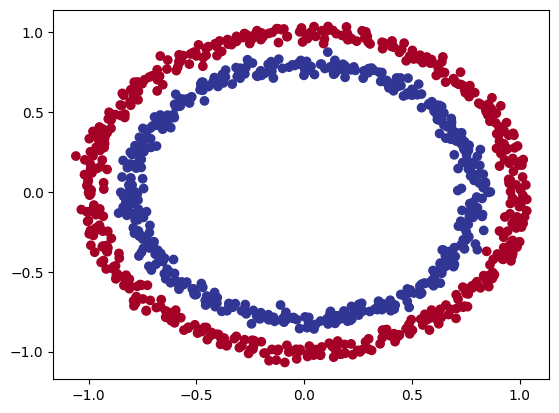

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classification


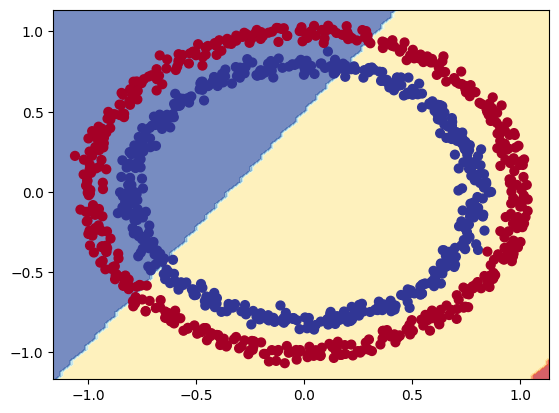

In [ ]:
plot_decision_boundary(model = model_4,x=X,y=y)

# Building our first neural network with non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = "relu")
])

model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_5.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 5.6030 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5545 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5315 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4855 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4860 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4452 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 5.3135 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 5.2951 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 5.2706 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2486 - accuracy: 0.4780
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation ="relu"),
                               tf.keras.layers.Dense(4,activation ="relu"),
                               tf.keras.layers.Dense(1,activation ="sigmoid")])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.7330 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7225 - accuracy: 0.4980
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.4780
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.4790
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.4850
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4730
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4790
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4760
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.4710
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.4540
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9710


[0.18049055337905884, 0.9710000157356262]

313/313 [==============================] - 0s 1ms/step
doing binary classification


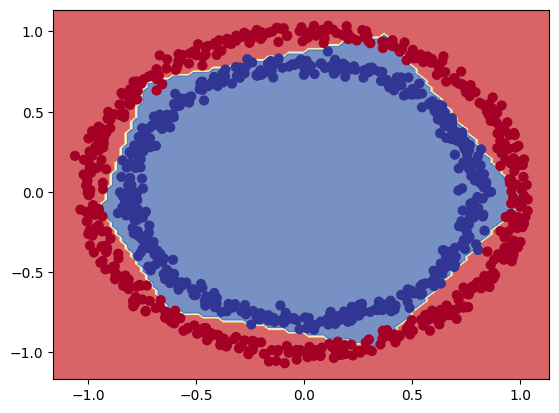

In [ ]:
plot_decision_boundary(model_7,X,y)

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
# Linear function
a = tf.cast(tf.range(-10,10),tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

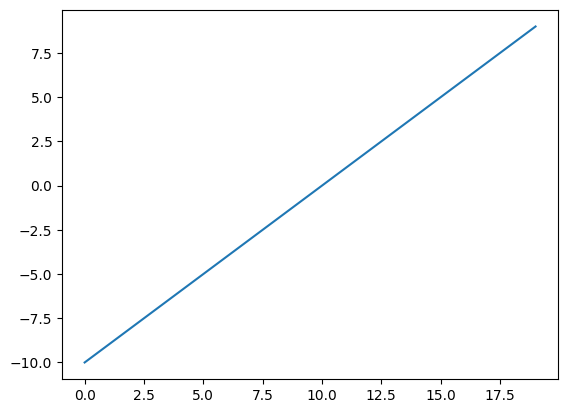

In [ ]:
plt.plot(a)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

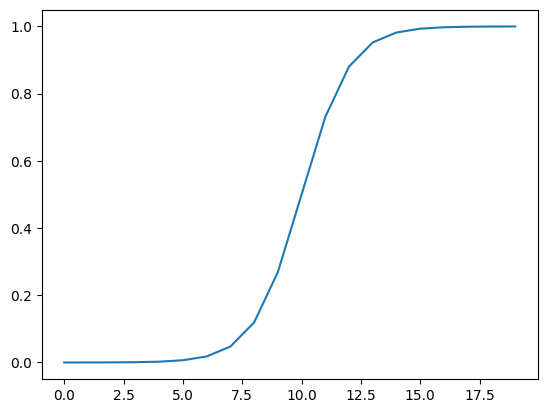

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(a))

In [ ]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

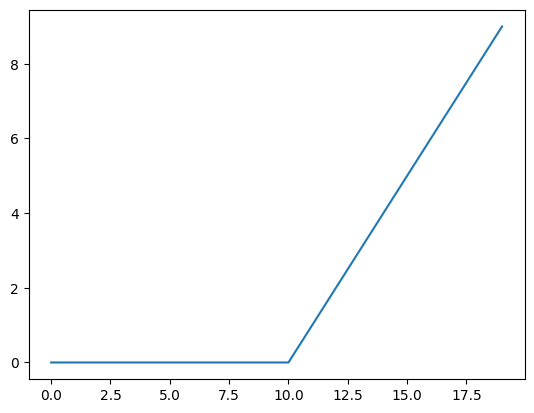

In [ ]:
plt.plot(relu(a))

# Evaluating and improving our classification
So let's create a training and test sets

In [ ]:
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation ="relu"),
                               tf.keras.layers.Dense(4, activation ="relu"),
                               tf.keras.layers.Dense(1, activation ="sigmoid")])

model_8.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr = 0.01),
               metrics = ["accuracy"])

y_train_reshaped = y_train.reshape(-1, 1)
history = model_8.fit(tf.expand_dims(X_train, axis=1), y_train_reshaped, epochs=250)

Epoch 1/250
25/25 [==============================] - 2s 3ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 2/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5075
Epoch 3/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5038
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5125
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5125
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5125
Epoch 7/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5125
Epoch 8/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5113
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5113
Epoch 10/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5138
Epoch 11/

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9850


[0.1362762600183487, 0.9850000143051147]

# Plot the loss or training curves


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692773,0.50000
1,0.690887,0.50750
2,0.689664,0.50375
3,0.689003,0.51250
4,0.688477,0.51250
...,...,...
245,0.159605,0.97125
246,0.158701,0.97250
247,0.157874,0.97000
248,0.156735,0.97375


Text(0.5, 1.0, 'Model 8 loss curves')

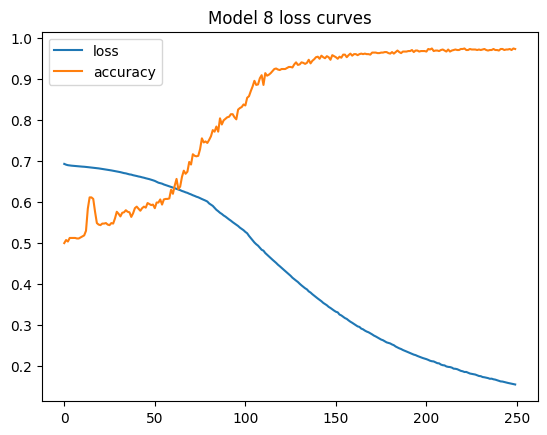

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves")

Loss functions going down means the model is improving

# Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A lr **callback** - you can think of a callback as an extra piece of functionality, you can add upto your model while training.
* Modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation ="relu"),
                               tf.keras.layers.Dense(4, activation ="relu"),
                               tf.keras.layers.Dense(1, activation ="sigmoid")])

model_9.compile(loss = "binary_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/200))

history_9 = model_9.fit(X_train,y_train, epochs = 100, callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7066 - accuracy: 0.4812 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4825 - lr: 1.0116e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4800 - lr: 1.0233e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4825 - lr: 1.0351e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.4800 - lr: 1.0471e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.4787 - lr: 1.0593e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4762 - lr: 1.0715e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4775 - lr: 1.0839e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

# Confusion matrix
TP, TN, FP, FN

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create
from sklearn.metrics import confusion_matrix

# Make preds
y_preds = model_8.predict(X_test)

confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[98,  3],
       [ 0, 99]])

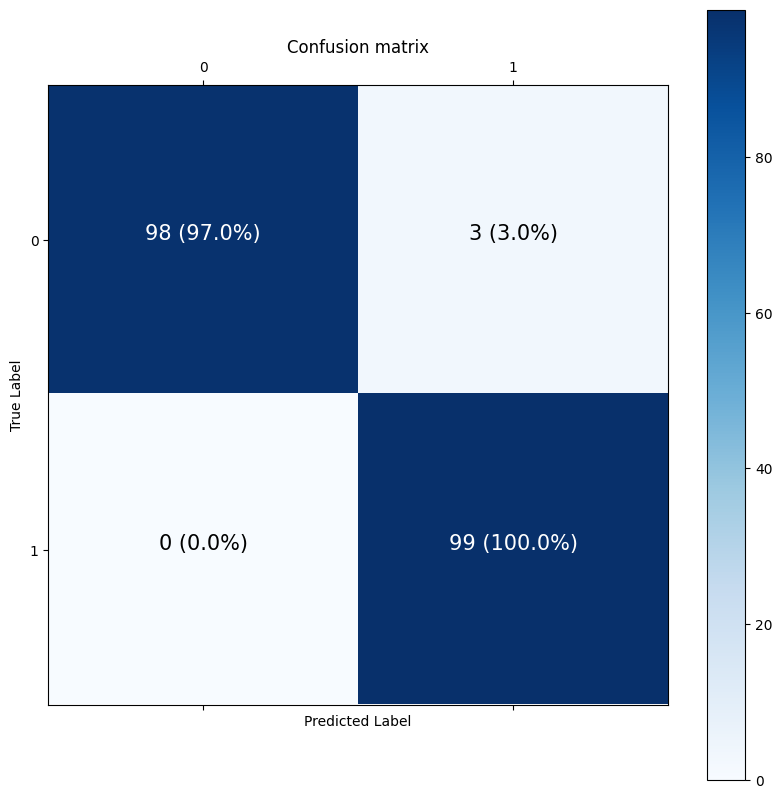

In [ ]:
import itertools
figsize = (10,10)
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize cm
n_classes = cm.shape[0]

# Let's prettify it
fig,ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion matrix",
       xlabel = "Predicted Label",
       ylabel=  "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

threshold = (cm.max() + cm.min()) / 2

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color ="white" if cm[i,j]>threshold else"black",
           size = 15)